# Python_assignment

Importing needed packages

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

creating an dictionary......

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [3]:
#d = get_sequences_from_file('penguins_cytb.fasta')
#print(d)

In [4]:
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = []
    index = 0
    
    for pos in range(0, len(string_nucleotides)//3):
        codon = string_nucleotides[index:index+3]
        index += 3
                     
        if codon == "TAA" or codon == "TAG" or codon == "AGA" or codon == "AGG":
             break
        else: 
            aa = mito_table.forward_table[codon]
            aa_seq_string.append(aa)
                     
    return(aa_seq_string)

In [5]:
#sequence = "ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC"
#print(translate_function(sequence))

Alternative translate function

In [6]:
from Bio.Alphabet import generic_dna
from Bio.Seq import Seq

In [7]:
def alternative_translation(dna_seq): #defining the alternative function for the dna_seq
    sequence = Seq(str(dna_seq), generic_dna) #creating object called sequence
    aa_seq = sequence.translate(table = 2, to_stop = True) #creating variable called sequence
    return(aa_seq)

Loading packages needed to comput molecular weight

In [8]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [9]:
def compute_molecular_weight(aa_seq): #computing melecular weight
    analyzed_seq = ProteinAnalysis(str(aa_seq)) #create a string of the amino acid sequence
    m_weight= analyzed_seq.molecular_weight() #take analyzed seq and return the molecular weight
    return(m_weight)

In [10]:
def gc_content(dna_seq): #checking gc content
    count = dna_seq.count("G") + dna_seq.count("C") #count the Gs and Cs
    gc = 100 * count /len(dna_seq) #getting the percentage
    return (gc) #returning gc

In [11]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") #extracting seqience from fasta file as a dictionary called cytb_seqs 
penguins_df = pd.read_csv("penguins_mass.csv") # Using panda (pd) to read the csv file. Includes only data for body mass 
species_list = list(penguins_df.species) #extracting peguins species list called "species_list"

In [12]:
print(penguins_df)

                    species   mass
0      Aptenodytes forsteri  28.00
1   Aptenodytes patagonicus  13.40
2       Eudyptes chrysocome   2.80
3     Eudyptes chrysolophus   4.50
4         Eudyptes sclateri   4.25
5           Eudyptula minor   1.60
6        Pygoscelis adeliae   4.60
7     Pygoscelis antarctica   4.10
8          Pygoscelis papua   6.10
9       Spheniscus demersus   3.20
10     Spheniscus humboldti   4.75
11  Spheniscus magellanicus   3.40


In [13]:
print(species_list)

['Aptenodytes forsteri', 'Aptenodytes patagonicus', 'Eudyptes chrysocome', 'Eudyptes chrysolophus', 'Eudyptes sclateri', 'Eudyptula minor', 'Pygoscelis adeliae', 'Pygoscelis antarctica', 'Pygoscelis papua', 'Spheniscus demersus', 'Spheniscus humboldti', 'Spheniscus magellanicus']


In [14]:
import numpy as np #using numpy to populate the nan
penguins_df = penguins_df.assign(Molecular_weight = np.nan, GC_content = np.nan)

Writing a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame

In [15]:
for key, value in cytb_seqs.items():
    aa_seq = alternative_translation(value)
    mol_weight = compute_molecular_weight(aa_seq)
    gc_cont = gc_content(value)
    index = penguins_df[penguins_df["species"] == key].index
    penguins_df.Molecular_weight[index] = mol_weight
    penguins_df.GC_content[index] = gc_cont

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Loading the matplotlibrary which displays plots will be displayed

In [21]:
%matplotlib inline

In [16]:
penguins_df.plot(x = "species", y = "mass", kind = "bar", color = "green",
                title = "Barplot plot of the mass of each species")

What is the smallest penguin species? Eudyptula minor 

What else is interesting about this species?

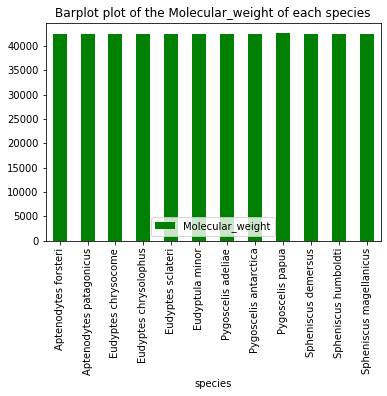

In [17]:
penguins_df.plot(x = "species", y = "Molecular_weight", kind = "bar", color = "green",
                title = "Barplot plot of the Molecular_weight of each species")

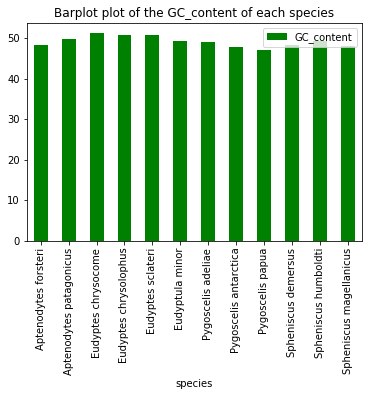

In [22]:
penguins_df.plot(x = "species", y = "GC_content", kind = "bar", color = "green",
                title = "Barplot plot of the GC_content of each species")

Plotting a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis)

In [19]:
import seaborn as sbn #used to draw scatter plot

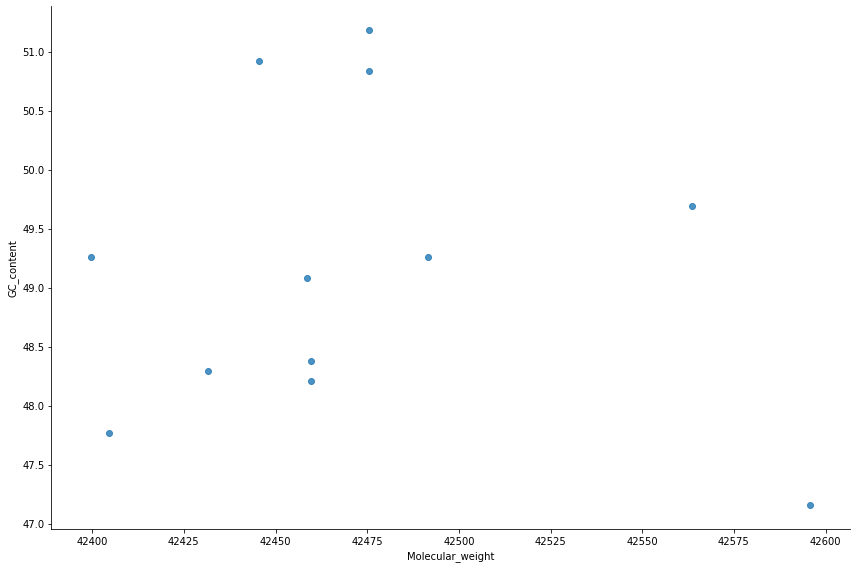

In [20]:
sbn.lmplot("Molecular_weight", "GC_content", data = penguins_df,
            fit_reg = False, height = 8, aspect = 1.5)

In [26]:
penguins_df.to_csv("penguins_mass_cytb.csv")